# **Predict Health Insurance Owners' who will be interested in Vehicle Insurance**

An insurance company that has provided Health Insurance to its customers want to build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [1]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split

# **Load the Data**

In [2]:
#Importing Data Set
train = pd.read_csv(r"C:\Users\user\Desktop\vehicle-insurance-classification\train.csv")
test = pd.read_csv(r"C:\Users\user\Desktop\vehicle-insurance-classification\test.csv")

# **View the data**

In [3]:
#View the data
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,508077,Male,39,1,28.0,0,1-2 Year,Yes,33670.0,124.0,133,1
1,116379,Male,60,1,9.0,1,1-2 Year,Yes,32660.0,26.0,64,0
2,24159,Female,20,1,43.0,0,< 1 Year,No,2630.0,160.0,283,0
3,129481,Female,22,1,47.0,0,< 1 Year,Yes,32665.0,26.0,42,0
4,469280,Male,25,1,28.0,1,< 1 Year,No,21602.0,152.0,293,0
5,219578,Female,34,1,28.0,0,1-2 Year,Yes,31853.0,157.0,34,1
6,298263,Female,20,1,35.0,1,< 1 Year,No,31962.0,160.0,257,0
7,388131,Female,41,1,36.0,0,> 2 Years,Yes,2630.0,124.0,103,1
8,46245,Female,26,1,29.0,1,< 1 Year,No,2630.0,160.0,68,0
9,345554,Female,42,1,28.0,1,1-2 Year,No,40643.0,13.0,176,0


In [4]:
display(f'Number of rows (clients): {train.shape[0]}')
display(f'Number of columns (characteristics): {train.shape[1]}')

'Number of rows (clients): 244578'

'Number of columns (characteristics): 12'

In [5]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000
mean,234645.165109,38.516400,0.998091,26.407007,0.489713,30705.566331,111.942566,154.291228,0.163617
std,139466.538310,15.221267,0.043655,13.179890,0.499895,16994.006743,54.304292,83.667275,0.369928
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115277.000000,25.000000,1.000000,15.000000,0.000000,24560.000000,26.000000,82.000000,0.000000
50%,230961.500000,36.000000,1.000000,28.000000,0.000000,31688.000000,147.000000,154.000000,0.000000
75%,345559.750000,49.000000,1.000000,35.000000,1.000000,39424.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# **Data Cleaning**

In [6]:
# drop id column
id = train['id']
train = train.drop('id',axis=1)
test = test.drop('id',axis=1)

In [7]:
# check missing values in train set
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

no missing data
nothing to replace

In [8]:
# check for duplicated data in train set
train.duplicated().any()

True

no duplicated data
nothing to remove

# **Data exploration**

<AxesSubplot:>

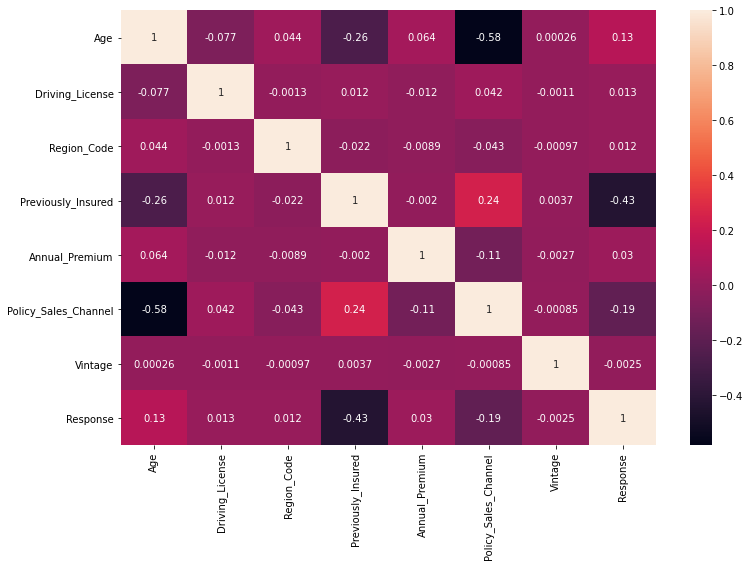

In [9]:
#Plotting a diagonal correlation matrix

correlation_matrix = train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)

In [10]:
hig_corr_features = correlation_matrix.index[abs(correlation_matrix["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Response'], dtype='object')

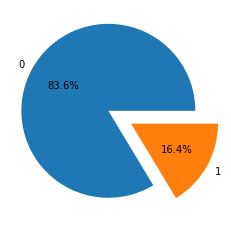

In [11]:
plt.pie(train['Response'].value_counts(),labels=train['Response'].value_counts().index,autopct="%0.1f%%",explode=[0.1,0.2],radius=1);

There is class imbalance in the target variable


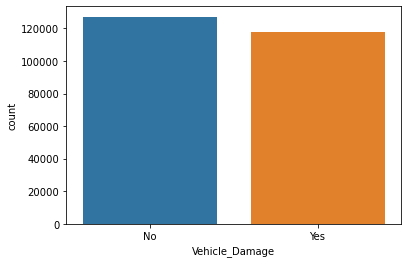

In [12]:
vehicle_Damage=train.groupby('Vehicle_Damage')['Response'].mean()
sns.countplot(x='Vehicle_Damage',data=train,order=vehicle_Damage.index);

People with previously damaged vehicels have much higher chances of buying insurance.

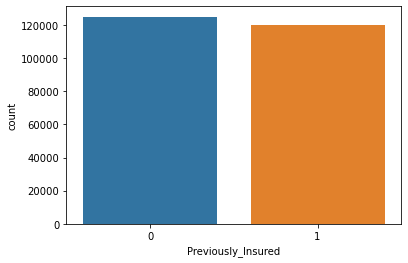

In [13]:
previously_Insured=train.groupby('Previously_Insured')['Response'].mean()
sns.countplot(x='Previously_Insured',data=train,order=previously_Insured.index);

The majority of respondents who shown interest in insurance,do not have their vehicles insured previously.

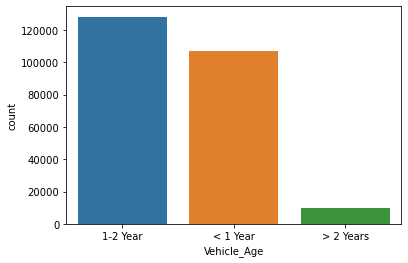

In [14]:
vehicle_Age=train.groupby('Vehicle_Age')['Response'].mean()
sns.countplot(x='Vehicle_Age',data=train ,order=vehicle_Age.index);

respondents with vehicule age of 0-2 show greater interest.

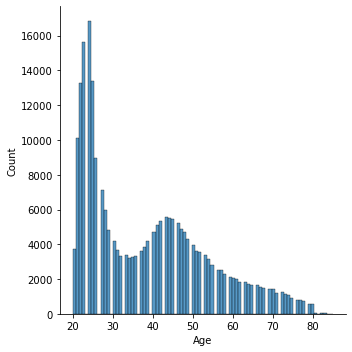

In [15]:
#Age Distribution of Customers
sns.displot(train.Age)

Age variable has non gaussian distribution

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

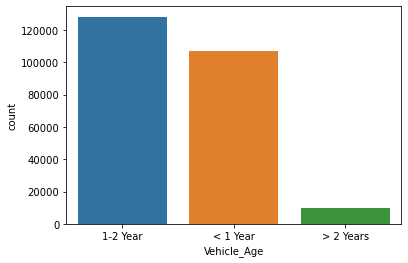

In [16]:
#Vehicle Age
sns.countplot(x=train.Vehicle_Age)

# **Data Preprocessing**

In [17]:
train['Vehicle_Age'].unique() 

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [18]:
train.shape

(244578, 11)

In [19]:
import numpy as np
Q1 = np.percentile(train['Annual_Premium'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['Annual_Premium'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
#replace outliers with the mean of 'EXPERIENCE_LENGTH' col
test['Annual_Premium'] = test['Annual_Premium'].where((test['Annual_Premium'] >= lower_bound) & (test['Annual_Premium'] <= upper_bound), np.log1p(test['Annual_Premium']))
train['Annual_Premium'] = train['Annual_Premium'].where((train['Annual_Premium'] >= lower_bound) & (train['Annual_Premium'] <= upper_bound), np.log1p(train['Annual_Premium']))

In [20]:
# train = pd.get_dummies(train, columns=['Gender','Vehicle_Age','Vehicle_Damage'])
# test = pd.get_dummies(test, columns=['Gender','Vehicle_Age','Vehicle_Damage'])

In [21]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder object
onehot_enc = OneHotEncoder()

# Fit and transform the OneHotEncoder object on the categorical variables
onehot = onehot_enc.fit_transform(train[['Gender','Vehicle_Age','Vehicle_Damage']])

# Convert the one-hot encoded sparse matrix to a dense array and create a new dataframe
onehot_df = pd.DataFrame(onehot.toarray(), columns=onehot_enc.get_feature_names_out(input_features=['Gender','Vehicle_Age','Vehicle_Damage']))


# Print the one-hot encoded variables
train = pd.concat([train, onehot_df], axis=1)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,Male,39,1,28.0,0,1-2 Year,Yes,33670.0,124.0,133,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,Male,60,1,9.0,1,1-2 Year,Yes,32660.0,26.0,64,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,Female,20,1,43.0,0,< 1 Year,No,2630.0,160.0,283,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Female,22,1,47.0,0,< 1 Year,Yes,32665.0,26.0,42,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Male,25,1,28.0,1,< 1 Year,No,21602.0,152.0,293,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244573,Male,24,1,28.0,0,1-2 Year,Yes,34733.0,122.0,99,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
244574,Female,20,1,3.0,0,< 1 Year,Yes,33810.0,160.0,10,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
244575,Male,38,1,28.0,1,1-2 Year,No,33419.0,122.0,164,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
244576,Female,33,1,28.0,1,1-2 Year,No,47285.0,124.0,166,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
train = train.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1)

# **Data Modelling**


In [23]:
#Divide the data into “attributes” and “labels”
X = train.drop('Response',axis=1) #separate the other attributes from the predicting attribute
y = train['Response']

In [24]:
# # transform the dataset to solve the imblance problem with SMOTE technique
# oversample = EditedNearestNeighbours()
# X, y = oversample.fit_resample(X, y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 80% training and 20% test

In [25]:
# transform the dataset to solve the imblance problem with SMOTE technique
oversample = SMOTEENN()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#X_test, y_test = oversample.fit_resample(X_test, y_test)

#Scaling Numeric Data
for df in [X_train, X_test,test]: 
    numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
    df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, log_loss, f1_score
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Print the classification report and confusion matrix
y_pred = rfc.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88     51236
           1       0.45      0.81      0.58      9909

    accuracy                           0.81     61145
   macro avg       0.70      0.81      0.73     61145
weighted avg       0.87      0.81      0.83     61145

Confusion Matrix: 
 [[41415  9821]
 [ 1886  8023]]


<AxesSubplot:>

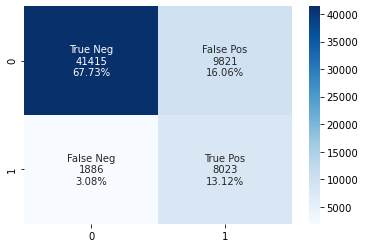

In [29]:
cf_matrixRF = confusion_matrix(y_test, y_pred)

group_names  = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixRF.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixRF.flatten()/np.sum(cf_matrixRF)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixRF, annot=labels, fmt='', cmap='Blues')

In [30]:
import scikitplot as skplt

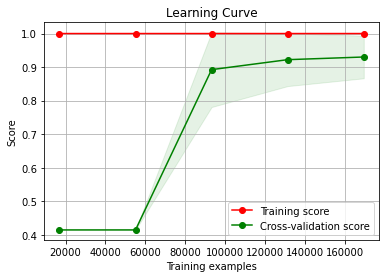

In [31]:
skplt.estimators.plot_learning_curve(rfc, X_train, y_train)
plt.show()

In [32]:
LR = LogisticRegression(class_weight='balanced')

# Fit the classifier to the training data
LR.fit(X_train, y_train)

# Use the classifier to predict the test data
y_pred = LR.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     51236
           1       0.39      0.88      0.54      9909

    accuracy                           0.76     61145
   macro avg       0.68      0.81      0.69     61145
weighted avg       0.88      0.76      0.79     61145

Confusion Matrix:
[[37859 13377]
 [ 1214  8695]]


<AxesSubplot:>

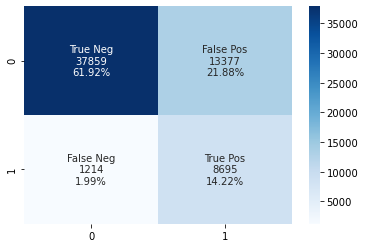

In [33]:
cf_matrixLR = confusion_matrix(y_test, y_pred)

group_names  = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixLR.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixLR.flatten()/np.sum(cf_matrixLR)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixLR, annot=labels, fmt='', cmap='Blues')

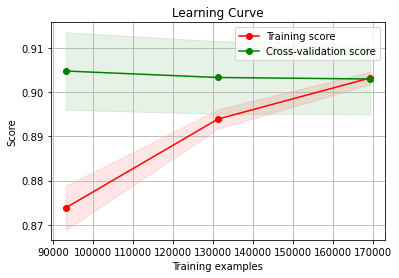

In [34]:
skplt.estimators.plot_learning_curve(LR, X_train, y_train)
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Use the classifier to predict the test data
y_pred = dt.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     51236
           1       0.42      0.69      0.53      9909

    accuracy                           0.80     61145
   macro avg       0.68      0.75      0.70     61145
weighted avg       0.85      0.80      0.82     61145

Confusion Matrix:
[[41971  9265]
 [ 3083  6826]]


<AxesSubplot:>

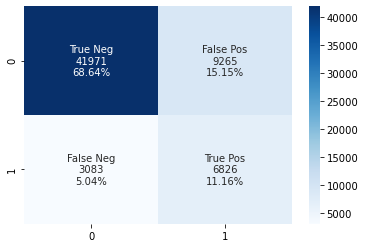

In [36]:
cf_matrixDT = confusion_matrix(y_test, y_pred)

group_names  = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixDT.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixDT.flatten()/np.sum(cf_matrixDT)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixDT, annot=labels, fmt='', cmap='Blues')

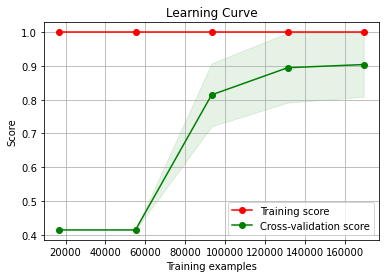

In [37]:
skplt.estimators.plot_learning_curve(dt, X_train, y_train)
plt.show()

In [38]:
from catboost import CatBoostClassifier, cv
cat = CatBoostClassifier(iterations = 1000, learning_rate = 0.1,
                         depth=6, loss_function="Logloss",silent=True)

# Fit the classifier to the training data
cat.fit(X_train, y_train)

# Use the classifier to predict the test data
y_pred = cat.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     51236
           1       0.45      0.83      0.59      9909

    accuracy                           0.81     61145
   macro avg       0.71      0.82      0.73     61145
weighted avg       0.88      0.81      0.83     61145

Confusion Matrix:
[[41309  9927]
 [ 1659  8250]]


<AxesSubplot:>

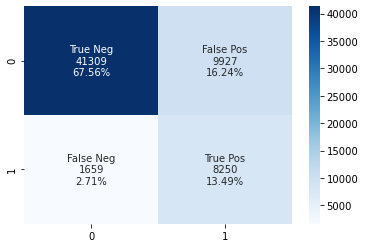

In [39]:
cf_matrixCB = confusion_matrix(y_test, y_pred)

group_names  = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixCB.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixCB.flatten()/np.sum(cf_matrixCB)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixCB, annot=labels, fmt='', cmap='Blues')

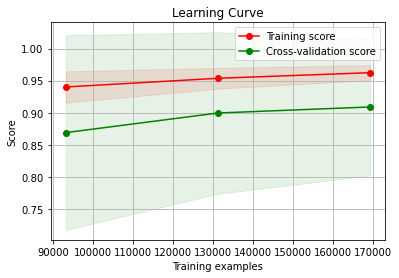

In [40]:
skplt.estimators.plot_learning_curve(cat, X_train, y_train)
plt.show()

In [41]:
import lightgbm as lgb
# Create a LightGBM classifier with class weight parameter
lgbm = lgb.LGBMClassifier(class_weight={0:.6, 1:.4}, random_state=42)

# Fit the classifier to the training data
lgbm.fit(X_train, y_train)

# Use the classifier to predict the test data
y_pred = lgbm.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     51236
           1       0.46      0.80      0.59      9909

    accuracy                           0.82     61145
   macro avg       0.71      0.81      0.73     61145
weighted avg       0.88      0.82      0.83     61145

Confusion Matrix:
[[42026  9210]
 [ 1975  7934]]


<AxesSubplot:>

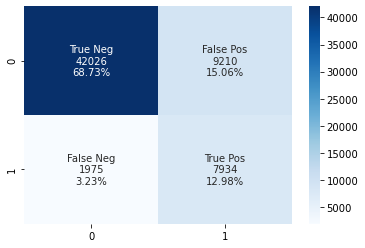

In [42]:
cf_matrixlgb = confusion_matrix(y_test, y_pred)

group_names  = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixlgb.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixlgb.flatten()/np.sum(cf_matrixlgb)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrixlgb, annot=labels, fmt='', cmap='Blues')

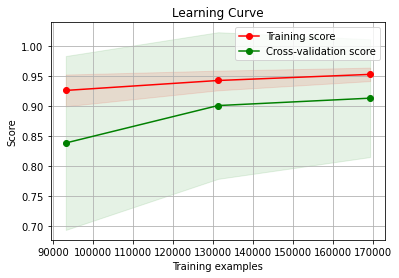

In [43]:
skplt.estimators.plot_learning_curve(lgbm, X_train, y_train)
plt.show()